In [1]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./updated_features1.csv")
df.head()

,HRV,SDSD,SDNN,RMSSD,PNN50,TINN,HTI,APEN,SD1,SD2,SDRatio,PLF,PHF,LFHFRatio,VLF,LF,HF,Class
0,0.908052,0.063515,5.642670,0.918895,1.0,0.015625,5.0,-0.033886,0.044912,7.600414,0.005721,80.762525,19.237475,4.198197,2.355132,0.090640,0.021664,GSVT
1,1.072700,0.180842,5.910351,1.087850,1.0,0.015625,5.0,0.128246,0.127875,7.923999,0.016138,82.000059,17.999941,4.555574,2.592221,0.129439,0.028416,AFIB
2,1.980903,0.530627,5.876639,2.050607,1.0,0.015625,3.0,-0.117783,0.375210,7.544863,0.049727,79.533708,20.466292,3.886083,2.608582,0.181173,0.046686,AFIB
3,0.519595,0.420627,5.479227,0.688756,1.0,0.015625,9.5,-0.015702,0.297428,7.532173,0.039433,81.805008,18.194992,4.496253,2.743589,0.070468,0.014770,GSVT
4,1.326730,0.327176,5.804215,1.366546,1.0,0.015625,4.0,0.024913,0.231348,7.675483,0.030142,81.627847,18.372153,4.443020,3.301605,0.204897,0.046112,AFIB


In [3]:
classList = df.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classList)
Y

array([1, 0, 0, ..., 0, 0, 0])

In [4]:
dict(enumerate(convertor.classes_))

{0: 'AFIB', 1: 'GSVT', 2: 'SA', 3: 'SB', 4: 'SR'}

In [5]:
fit = StandardScaler()
X = fit.fit_transform(df.iloc[:, :-1])
X

array([[-1.28456778, -0.29840352,  0.09833725, ..., -0.65540195,
        -1.21270515, -1.32340512],
       [-0.97291611,  0.50576379,  1.34298072, ..., -0.12936319,
        -0.6240159 , -0.91389081],
       [ 0.74616921,  2.90321171,  1.18622862, ..., -0.09306054,
         0.16092978,  0.1941742 ],
       ...,
       [ 0.65908532,  2.64495768,  0.45377194, ..., -0.55573883,
        -0.79443383, -0.50604782],
       [-0.14438682,  0.98281684,  0.57193916, ..., -1.34315663,
        -1.02294007, -0.37811668],
       [-0.62745595,  0.98819463,  0.9260074 , ...,  1.50069202,
         0.11838924, -0.03357032]])

In [6]:
X.shape

(10498, 17)

In [7]:
df.shape

(10498, 18)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [9]:
print(f'Training sample: X = {X_train.shape}, Y = {Y_train.shape}')
print(f'Testing sample: X = {X_test.shape}, Y = {Y_test.shape}')

Training sample: X = (8398, 17), Y = (8398,)
Testing sample: X = (2100, 17), Y = (2100,)


In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1], )),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               9216      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [12]:
def train_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size)
    return history

def plot_validate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"])*100)
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [13]:
model_history = train_model(model, 500, "adam")

Epoch 1/500
66/66 [==============================] - 1s 11ms/step - loss: 1.1660 - accuracy: 0.7642 - val_loss: 1.0478 - val_accuracy: 0.8581
Epoch 2/500
66/66 [==============================] - 1s 9ms/step - loss: 1.0345 - accuracy: 0.8710 - val_loss: 1.0394 - val_accuracy: 0.8643
Epoch 3/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0281 - accuracy: 0.8772 - val_loss: 1.0376 - val_accuracy: 0.8671
Epoch 4/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0277 - accuracy: 0.8774 - val_loss: 1.0437 - val_accuracy: 0.8590
Epoch 5/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0264 - accuracy: 0.8775 - val_loss: 1.0347 - val_accuracy: 0.8690
Epoch 6/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0196 - accuracy: 0.8857 - val_loss: 1.0326 - val_accuracy: 0.8710
Epoch 7/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0228 - accuracy: 0.8815 - val_loss: 1.0299 - val_accuracy: 0.8752
Epoch 8

66/66 [==============================] - 1s 11ms/step - loss: 1.0021 - accuracy: 0.9027 - val_loss: 1.0161 - val_accuracy: 0.8881
Epoch 59/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0029 - accuracy: 0.9016 - val_loss: 1.0137 - val_accuracy: 0.8905
Epoch 60/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0034 - accuracy: 0.9010 - val_loss: 1.0093 - val_accuracy: 0.8962
Epoch 61/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0063 - accuracy: 0.8985 - val_loss: 1.0180 - val_accuracy: 0.8852
Epoch 62/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0087 - accuracy: 0.8960 - val_loss: 1.0319 - val_accuracy: 0.8729
Epoch 63/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0038 - accuracy: 0.9014 - val_loss: 1.0121 - val_accuracy: 0.8919
Epoch 64/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0040 - accuracy: 0.9006 - val_loss: 1.0137 - val_accuracy: 0.8895
Epoch 65/500

66/66 [==============================] - 1s 11ms/step - loss: 1.0019 - accuracy: 0.9028 - val_loss: 1.0131 - val_accuracy: 0.8914
Epoch 116/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0007 - accuracy: 0.9041 - val_loss: 1.0118 - val_accuracy: 0.8924
Epoch 117/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0020 - accuracy: 0.9027 - val_loss: 1.0145 - val_accuracy: 0.8900
Epoch 118/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0066 - accuracy: 0.8983 - val_loss: 1.0177 - val_accuracy: 0.8871
Epoch 119/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0033 - accuracy: 0.9016 - val_loss: 1.0119 - val_accuracy: 0.8929
Epoch 120/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0014 - accuracy: 0.9034 - val_loss: 1.0137 - val_accuracy: 0.8910
Epoch 121/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0022 - accuracy: 0.9027 - val_loss: 1.0118 - val_accuracy: 0.8929
Epoch 

66/66 [==============================] - 1s 11ms/step - loss: 1.0006 - accuracy: 0.9043 - val_loss: 1.0136 - val_accuracy: 0.8914
Epoch 173/500
66/66 [==============================] - 1s 11ms/step - loss: 0.9985 - accuracy: 0.9063 - val_loss: 1.0122 - val_accuracy: 0.8924
Epoch 174/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0004 - accuracy: 0.9045 - val_loss: 1.0125 - val_accuracy: 0.8924
Epoch 175/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0012 - accuracy: 0.9037 - val_loss: 1.0125 - val_accuracy: 0.8924
Epoch 176/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0004 - accuracy: 0.9045 - val_loss: 1.0127 - val_accuracy: 0.8924
Epoch 177/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0017 - accuracy: 0.9031 - val_loss: 1.0136 - val_accuracy: 0.8910
Epoch 178/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0143 - accuracy: 0.8905 - val_loss: 1.0197 - val_accuracy: 0.8852
Epoch 

66/66 [==============================] - 1s 11ms/step - loss: 1.0052 - accuracy: 0.8996 - val_loss: 1.0232 - val_accuracy: 0.8814
Epoch 230/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0072 - accuracy: 0.8975 - val_loss: 1.0219 - val_accuracy: 0.8829
Epoch 231/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0066 - accuracy: 0.8982 - val_loss: 1.0172 - val_accuracy: 0.8876
Epoch 232/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0067 - accuracy: 0.8982 - val_loss: 1.0182 - val_accuracy: 0.8867
Epoch 233/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0052 - accuracy: 0.8996 - val_loss: 1.0196 - val_accuracy: 0.8852
Epoch 234/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0084 - accuracy: 0.8964 - val_loss: 1.0198 - val_accuracy: 0.8848
Epoch 235/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0073 - accuracy: 0.8974 - val_loss: 1.0190 - val_accuracy: 0.8857
Epoch 

66/66 [==============================] - 1s 11ms/step - loss: 1.0200 - accuracy: 0.8847 - val_loss: 1.0507 - val_accuracy: 0.8543
Epoch 287/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0102 - accuracy: 0.8946 - val_loss: 1.0186 - val_accuracy: 0.8862
Epoch 288/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0078 - accuracy: 0.8971 - val_loss: 1.0201 - val_accuracy: 0.8848
Epoch 289/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0111 - accuracy: 0.8938 - val_loss: 1.0281 - val_accuracy: 0.8767
Epoch 290/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0133 - accuracy: 0.8915 - val_loss: 1.0223 - val_accuracy: 0.8824
Epoch 291/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0090 - accuracy: 0.8956 - val_loss: 1.0254 - val_accuracy: 0.8795
Epoch 292/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0140 - accuracy: 0.8908 - val_loss: 1.0231 - val_accuracy: 0.8819
Epoch 

66/66 [==============================] - 1s 11ms/step - loss: 1.0055 - accuracy: 0.8993 - val_loss: 1.0151 - val_accuracy: 0.8895
Epoch 344/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0097 - accuracy: 0.8952 - val_loss: 1.0196 - val_accuracy: 0.8852
Epoch 345/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0055 - accuracy: 0.8993 - val_loss: 1.0182 - val_accuracy: 0.8867
Epoch 346/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0115 - accuracy: 0.8932 - val_loss: 1.0325 - val_accuracy: 0.8724
Epoch 347/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0218 - accuracy: 0.8829 - val_loss: 1.0229 - val_accuracy: 0.8819
Epoch 348/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0176 - accuracy: 0.8872 - val_loss: 1.0208 - val_accuracy: 0.8838
Epoch 349/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0143 - accuracy: 0.8905 - val_loss: 1.0358 - val_accuracy: 0.8690
Epoch 

Epoch 400/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0090 - accuracy: 0.8959 - val_loss: 1.0171 - val_accuracy: 0.8876
Epoch 401/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0064 - accuracy: 0.8985 - val_loss: 1.0177 - val_accuracy: 0.8871
Epoch 402/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0053 - accuracy: 0.8995 - val_loss: 1.0129 - val_accuracy: 0.8919
Epoch 403/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0045 - accuracy: 0.9003 - val_loss: 1.0129 - val_accuracy: 0.8919
Epoch 404/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0031 - accuracy: 0.9018 - val_loss: 1.0177 - val_accuracy: 0.8871
Epoch 405/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0061 - accuracy: 0.8987 - val_loss: 1.0182 - val_accuracy: 0.8867
Epoch 406/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0210 - accuracy: 0.8838 - val_loss: 1.0406 - val_accuracy:

Epoch 457/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0049 - accuracy: 0.9000 - val_loss: 1.0239 - val_accuracy: 0.8810
Epoch 458/500
66/66 [==============================] - 1s 11ms/step - loss: 1.0035 - accuracy: 0.9014 - val_loss: 1.0201 - val_accuracy: 0.8848
Epoch 459/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0031 - accuracy: 0.9016 - val_loss: 1.0191 - val_accuracy: 0.8857
Epoch 460/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0058 - accuracy: 0.8990 - val_loss: 1.0222 - val_accuracy: 0.8824
Epoch 461/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0056 - accuracy: 0.8993 - val_loss: 1.0197 - val_accuracy: 0.8852
Epoch 462/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0037 - accuracy: 0.9012 - val_loss: 1.0210 - val_accuracy: 0.8838
Epoch 463/500
66/66 [==============================] - 1s 10ms/step - loss: 1.0039 - accuracy: 0.9009 - val_loss: 1.0205 - val_accuracy:

Validation Accuracy 89.66666460037231


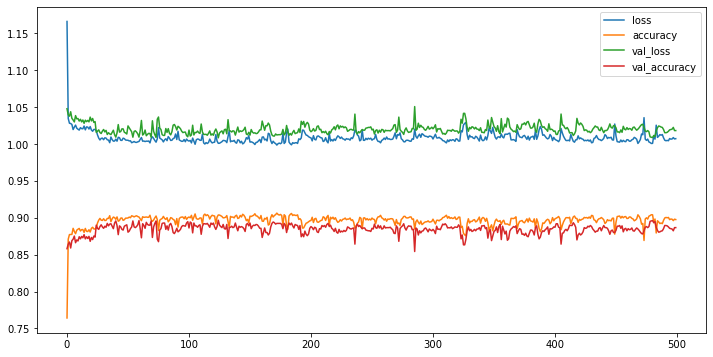

In [14]:
plot_validate(model_history)

In [15]:
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=128)
print(f'The test loss is: {round(test_loss, 2)}')
print(f'The Best accuracy is: {round(test_acc*100, 2)}')

17/17 [==============================] - 0s 3ms/step - loss: 1.0182 - accuracy: 0.8867
The test loss is: 1.02
The Best accuracy is: 88.67
